<a href="https://colab.research.google.com/github/Loai-AL-Sabahi/Fruits-Expiry-Detector-Machine-Learning-AI/blob/main/Final_Project_Loai_AL_Sabahi_A21MJ4003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title: Final Project**
# **Name: Loai AL-sabahi**
# **Matric Number: A21MJ4003**



*   **Introduction:**

This project focuses on building an image classification model using Convolutional Neural Networks (CNNs) to distinguish between fresh and rotten fruits, specifically apples and bananas. The dataset comprises images of both fresh and rotten fruits, gathered separately for apples and bananas. The implementation is in Python, utilizing the Keras library for creating and training the CNN model. The project involves preprocessing and combining datasets, defining and training the CNN architecture, evaluating model performance, and providing a user interface for uploading images to be classified as either fresh or rotten. The goal is to showcase the application of deep learning techniques in food quality assessment, with potential applications in real-world scenarios such as quality control in agriculture or the food industry.

**1.  Imports and File Paths**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from google.colab import files

In [ ]:
# Define the paths to the folders containing images for training and testing
train_fresh_apples_path = "/content/drive/MyDrive/loai python/assignments/project/training_data/freshapples"
train_rotten_apples_path = "/content/drive/MyDrive/loai python/assignments/project/training_data/rottenapples"
test_fresh_apples_path = "/content/drive/MyDrive/loai python/assignments/project/testing_data/freshapples"
test_rotten_apples_path = "/content/drive/MyDrive/loai python/assignments/project/testing_data/rottenapples"
train_fresh_bananas_path = "/content/drive/MyDrive/loai python/assignments/project/training_data/freshbanana"
train_rotten_bananas_path = "/content/drive/MyDrive/loai python/assignments/project/training_data/rottenbanana"
test_fresh_bananas_path = "/content/drive/MyDrive/loai python/assignments/project/testing_data/freshbanana"
test_rotten_bananas_path = "/content/drive/MyDrive/loai python/assignments/project/testing_data/rottenbanana"

This block above includes necessary library imports for image processing, machine learning, and file handling. The files module is imported from google.colab to handle file uploads in Google Colab. File paths for training and testing sets of fresh and rotten apples and bananas are defined.

**2. Image Loading Function**

In [ ]:
# Function to load and preprocess the images
def load_images(folder_path, label):
    images = []
    labels = []
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
        image = cv2.resize(image, (64, 64))  # Resize to a common size
        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)

This function loads and preprocesses images from a specified folder path. It reads images using OpenCV, converts them to RGB format, resizes them to a common size (64x64 pixels), and appends them to the images list along with their corresponding labels.

**3.  Loading and Displaying Images**

In [ ]:
# Load and preprocess images for training set - apples
train_fresh_apples_images, train_fresh_apples_labels = load_images(train_fresh_apples_path, label="fresh")
train_rotten_apples_images, train_rotten_apples_labels = load_images(train_rotten_apples_path, label="rotten")

In [ ]:
# Load and preprocess images for testing set - apples
test_fresh_apples_images, test_fresh_apples_labels = load_images(test_fresh_apples_path, label="fresh")
test_rotten_apples_images, test_rotten_apples_labels = load_images(test_rotten_apples_path, label="rotten")

In [ ]:
# Load and preprocess images for training set - bananas
train_fresh_bananas_images, train_fresh_bananas_labels = load_images(train_fresh_bananas_path, label="fresh")
train_rotten_bananas_images, train_rotten_bananas_labels = load_images(train_rotten_bananas_path, label="rotten")

In [ ]:
# Load and preprocess images for testing set - bananas
test_fresh_bananas_images, test_fresh_bananas_labels = load_images(test_fresh_bananas_path, label="fresh")
test_rotten_bananas_images, test_rotten_bananas_labels = load_images(test_rotten_bananas_path, label="rotten")

In [ ]:
# Display a few images
def display_images(images, labels, category, num_images=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f'{category.capitalize()} - {labels[i]}')
        plt.axis('off')
    plt.show()

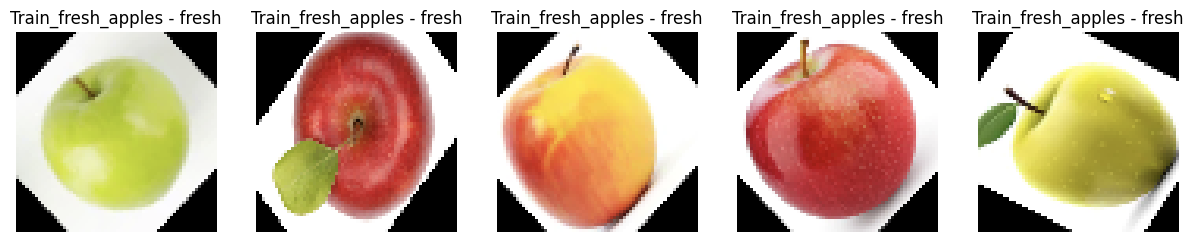

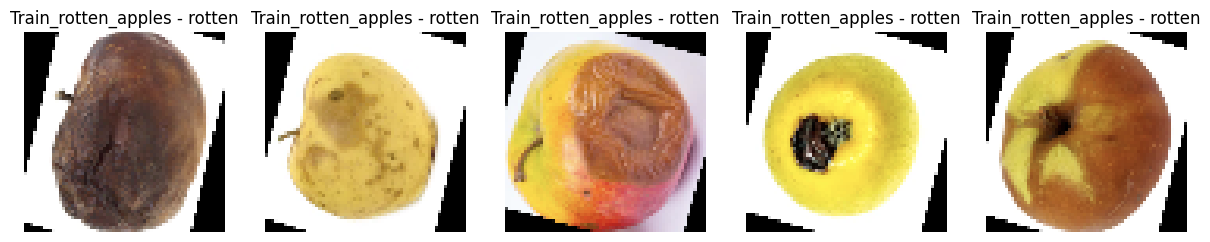

In [ ]:
# Display training set images - apples
display_images(train_fresh_apples_images, train_fresh_apples_labels, category='train_fresh_apples', num_images=5)
display_images(train_rotten_apples_images, train_rotten_apples_labels, category='train_rotten_apples', num_images=5)

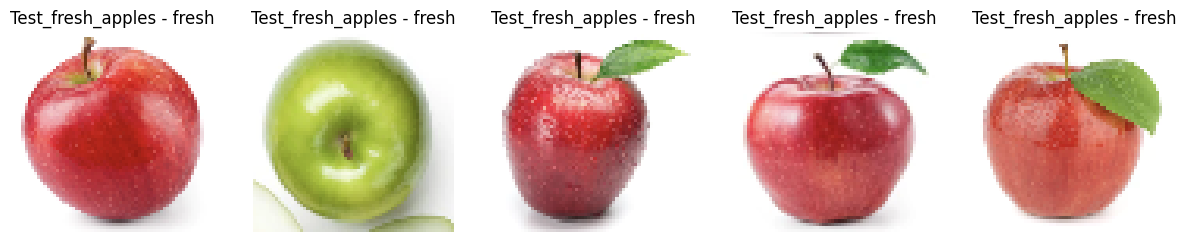

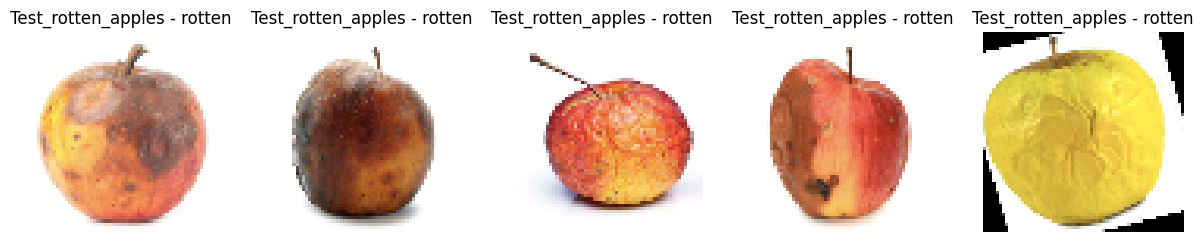

In [ ]:
# Display testing set images - apples
display_images(test_fresh_apples_images, test_fresh_apples_labels, category='test_fresh_apples', num_images=5)
display_images(test_rotten_apples_images, test_rotten_apples_labels, category='test_rotten_apples', num_images=5)

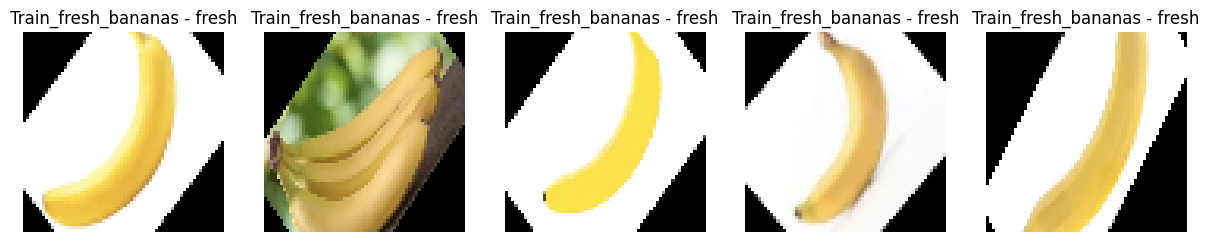

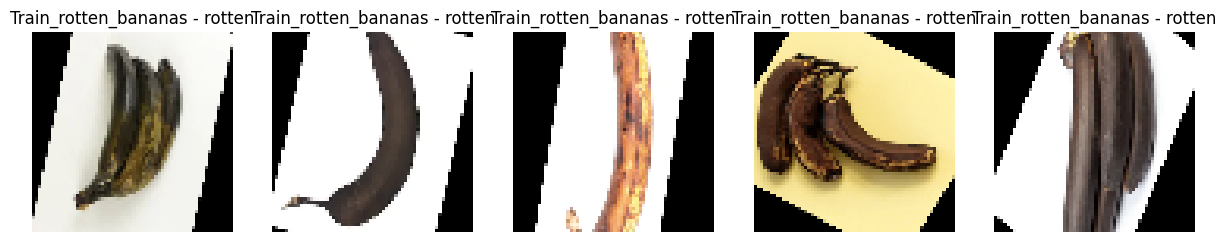

In [ ]:
# Display training set images - bananas
display_images(train_fresh_bananas_images, train_fresh_bananas_labels, category='train_fresh_bananas', num_images=5)
display_images(train_rotten_bananas_images, train_rotten_bananas_labels, category='train_rotten_bananas', num_images=5)

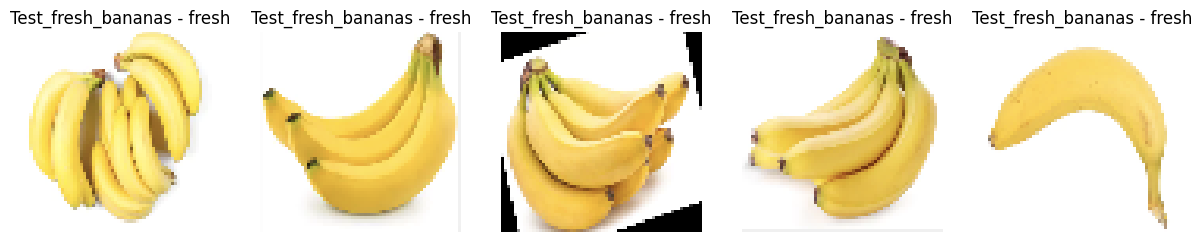

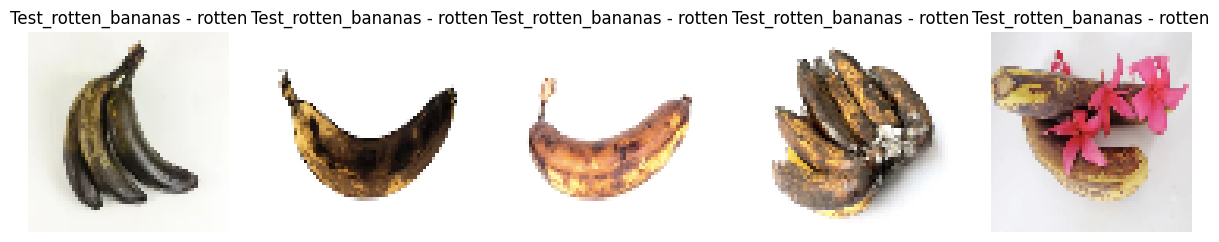

In [ ]:
# Display testing set images - bananas
display_images(test_fresh_bananas_images, test_fresh_bananas_labels, category='test_fresh_bananas', num_images=5)
display_images(test_rotten_bananas_images, test_rotten_bananas_labels, category='test_rotten_bananas', num_images=5)

Images for fresh and rotten apples and bananas are loaded and displayed using the display_images function. This helps visualize a few examples from the training and testing sets for both fruits.

**4. Combining Datasets**

In [ ]:
# Combine fresh and rotten datasets for training - apples
train_images_apples = np.concatenate((train_fresh_apples_images, train_rotten_apples_images), axis=0)
train_labels_apples = np.concatenate((train_fresh_apples_labels, train_rotten_apples_labels), axis=0)

In [ ]:
# Combine fresh and rotten datasets for testing - apples
test_images_apples = np.concatenate((test_fresh_apples_images, test_rotten_apples_images), axis=0)
test_labels_apples = np.concatenate((test_fresh_apples_labels, test_rotten_apples_labels), axis=0)

In [ ]:
# Combine fresh and rotten datasets for training - bananas
train_images_bananas = np.concatenate((train_fresh_bananas_images, train_rotten_bananas_images), axis=0)
train_labels_bananas = np.concatenate((train_fresh_bananas_labels, train_rotten_bananas_labels), axis=0)

In [ ]:
# Combine fresh and rotten datasets for testing - bananas
test_images_bananas = np.concatenate((test_fresh_bananas_images, test_rotten_bananas_images), axis=0)
test_labels_bananas = np.concatenate((test_fresh_bananas_labels, test_rotten_bananas_labels), axis=0)

In [ ]:
# Combine fresh and rotten datasets for training and testing
train_images = np.concatenate((train_images_apples, train_images_bananas), axis=0)
train_labels = np.concatenate((train_labels_apples, train_labels_bananas), axis=0)
test_images = np.concatenate((test_images_apples, test_images_bananas), axis=0)
test_labels = np.concatenate((test_labels_apples, test_labels_bananas), axis=0)

In [ ]:
# Map labels to numerical values (0 for fresh, 1 for rotten)
label_mapping = {"fresh": 0, "rotten": 1}
train_numeric_labels = np.array([label_mapping[label] for label in train_labels])
test_numeric_labels = np.array([label_mapping[label] for label in test_labels])

In [ ]:
# Convert labels to one-hot encoding
train_labels_one_hot = to_categorical(train_numeric_labels)
test_labels_one_hot = to_categorical(test_numeric_labels)

In [ ]:
# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels_one_hot, test_size=0.2, random_state=42
)

Fresh and rotten apple datasets are combined separately for training and testing. Similarly, fresh and rotten banana datasets are combined. This is done to create unified datasets for each fruit.

**5. Model Definition, Compilation, and Training**

In [ ]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Two classes: fresh and rotten

**Sequential Model:** This code creates a sequential model using Keras, where layers are added one by one.

**Convolutional Layers (Conv2D): **These layers learn spatial hierarchies of features from the input images. The first Conv2D layer has 32 filters of size (3, 3), uses the ReLU activation function, and expects input images of shape (64, 64, 3) (64x64 pixels with 3 color channels - RGB). The second Conv2D layer has 64 filters and also uses ReLU activation.

**MaxPooling Layers:** MaxPooling layers downsample the spatial dimensions, reducing the number of parameters and computational complexity. They follow each Conv2D layer and have a pool size of (2, 2).

**Flatten Layer:** This layer flattens the output from the previous layers into a 1D array, preparing it for the fully connected layers.

**Dense Layers (Fully Connected):** These layers are fully connected and learn global patterns from features. The first dense layer has 128 neurons with a ReLU activation function. The final dense layer has 2 neurons (one for each class - fresh and rotten) with a softmax activation function, producing probability scores for each class.

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Optimizer (Adam):** The Adam optimizer is chosen for its adaptive learning rate and efficiency in training neural networks.

**Loss Function (Categorical Crossentropy):** Categorical crossentropy is used as the loss function for multi-class classification problems.

**Metrics (Accuracy):**The model's performance is evaluated using accuracy, indicating the proportion of correctly classified samples.

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
197/197 [==============================] - 69s 342ms/step - loss: 11.7053 - accuracy: 0.7734 - val_loss: 0.2013 - val_accuracy: 0.9201
Epoch 2/10
197/197 [==============================] - 45s 229ms/step - loss: 0.1786 - accuracy: 0.9292 - val_loss: 0.1453 - val_accuracy: 0.9423
Epoch 3/10
197/197 [==============================] - 41s 207ms/step - loss: 0.1321 - accuracy: 0.9424 - val_loss: 0.1376 - val_accuracy: 0.9473
Epoch 4/10
197/197 [==============================] - 48s 243ms/step - loss: 0.1154 - accuracy: 0.9513 - val_loss: 0.1149 - val_accuracy: 0.9511
Epoch 5/10
197/197 [==============================] - 40s 204ms/step - loss: 0.1045 - accuracy: 0.9570 - val_loss: 0.1809 - val_accuracy: 0.9308
Epoch 6/10
197/197 [==============================] - 43s 217ms/step - loss: 0.0924 - accuracy: 0.9632 - val_loss: 0.1101 - val_accuracy: 0.9607
Epoch 7/10
197/197 [==============================] - 44s 225ms/step - loss: 0.0754 - accuracy: 0.9699 - val_loss: 0.0979 - val_a

**Training Data:** The model is trained on the training dataset (train_images and train_labels).

**Epochs:** Training occurs over 10 epochs, meaning the model goes through the entire training dataset 10 times. An epoch is one complete pass through all the training data.

**Validation Data:** The model's performance is monitored on a validation set (val_images and val_labels) during training to detect overfitting.

**Training History:** The training history is stored in the history variable, which includes metrics such as training and validation accuracy and loss over each epoch.

A convolutional neural network (CNN) model is defined using Keras. It consists of convolutional layers, max-pooling layers, and dense layers. The model is compiled with the Adam optimizer and categorical crossentropy loss. It is then trained on the combined datasets for both apples and bananas.

**6. Evaluation and Plotting**

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot)
print(f'Test accuracy: {test_acc}')

60/60 [==============================] - 3s 44ms/step - loss: 0.1165 - accuracy: 0.9528
Test accuracy: 0.9528054594993591


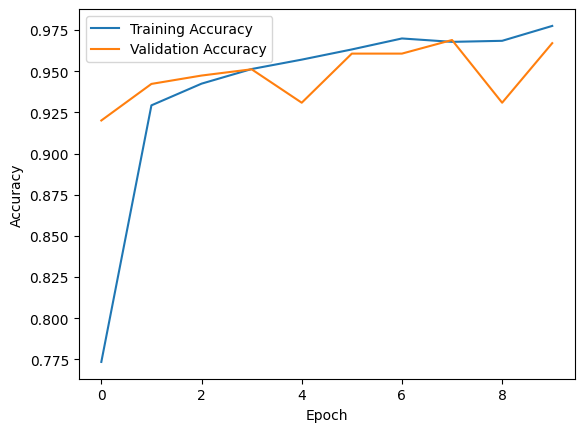

In [ ]:
# Plot training history (optional)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The trained model is evaluated on the test set, and the accuracy is printed. Additionally, the training history is plotted, showing the training accuracy and validation accuracy over epochs.

**7.  Image Classification Functions**

In [ ]:
# Function to preprocess the uploaded image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, (64, 64))  # Resize to a common size
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

In [ ]:
# Function to classify the uploaded image
def classify_image(file_path):
    input_image = preprocess_image(file_path)
    prediction = model.predict(input_image)

    # Get the predicted class
    predicted_class = np.argmax(prediction)

    print(f"The predicted label for this fruit is {'fresh' if predicted_class == 0 else 'rotten'}")

Functions for preprocessing and classifying an uploaded image are defined. The preprocess_image function converts the uploaded image to the required format, and the classify_image function uses the trained model to predict whether the uploaded fruit is fresh or rotten.

**8. Uploading and Processing an Image**

In [ ]:
# Upload an image
uploaded = files.upload()

Saving freshbanana.jpg to freshbanana (1).jpg


In [ ]:
# Process the uploaded image
if uploaded:
    file_path = list(uploaded.keys())[0]
    classify_image(file_path)

1/1 [==============================] - 0s 31ms/step
The predicted label for this fruit is fresh


An image is uploaded using the files.upload() function. If an image is uploaded, it is processed and classified using the previously defined functions.

**9. Conclusion:**

In conclusion, this project successfully demonstrates the development of an image classification model for deffrentiating between fresh and rotten fruits, specifically apples and bananas. Through the utilization of Convolutional Neural Networks (CNNs), the model showcases the ability to learn and generalize patterns from image data, providing a reliable tool for fruit quality assessment. The training and evaluation processes illustrate the effectiveness of the model in accurately categorizing fruits based on their visual characteristics. Additionally, the incorporation of a user interface allows for practical applications, enabling users to upload and classify images, making the project accessible and user-friendly. Overall, this project exemplifies the potential of deep learning techniques in addressing real-world challenges, particularly in quality control within the agricultural and food industries.